Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Use this cell to personalize file locations and file names

In [ ]:
data_file_location = 'Data/all_normalized_data.tsv'
demographic_destination = 'Data/'
demographics_file_name = 'demographic_plot.jpg'
fig_2_destination = 'Figures/'
fig_2_file_name = 'Figure_1.jpg'

Run this cell to save the demographics figure

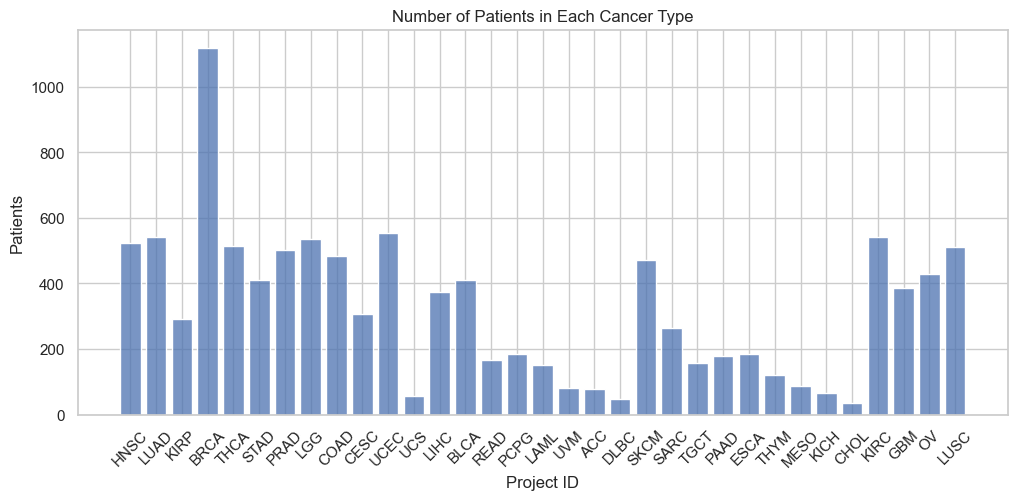

In [9]:
# Load the data from the data file
data = pd.read_csv(data_file_location, sep='\t')

# Format the style of the figure
sns.set(style="whitegrid")
plt.figure(figsize=(12, 5))
sns.histplot(data["project_id"], discrete=True, shrink=0.8)
plt.xlabel("Project ID")
plt.ylabel("Patients")
plt.title("Number of Patients in Each Cancer Type")
plt.xticks(rotation=45)

# Save and show the plot
plt.savefig(demographic_information_destination + demographics_file_name)
plt.show()

Run this cell to save Figure 2

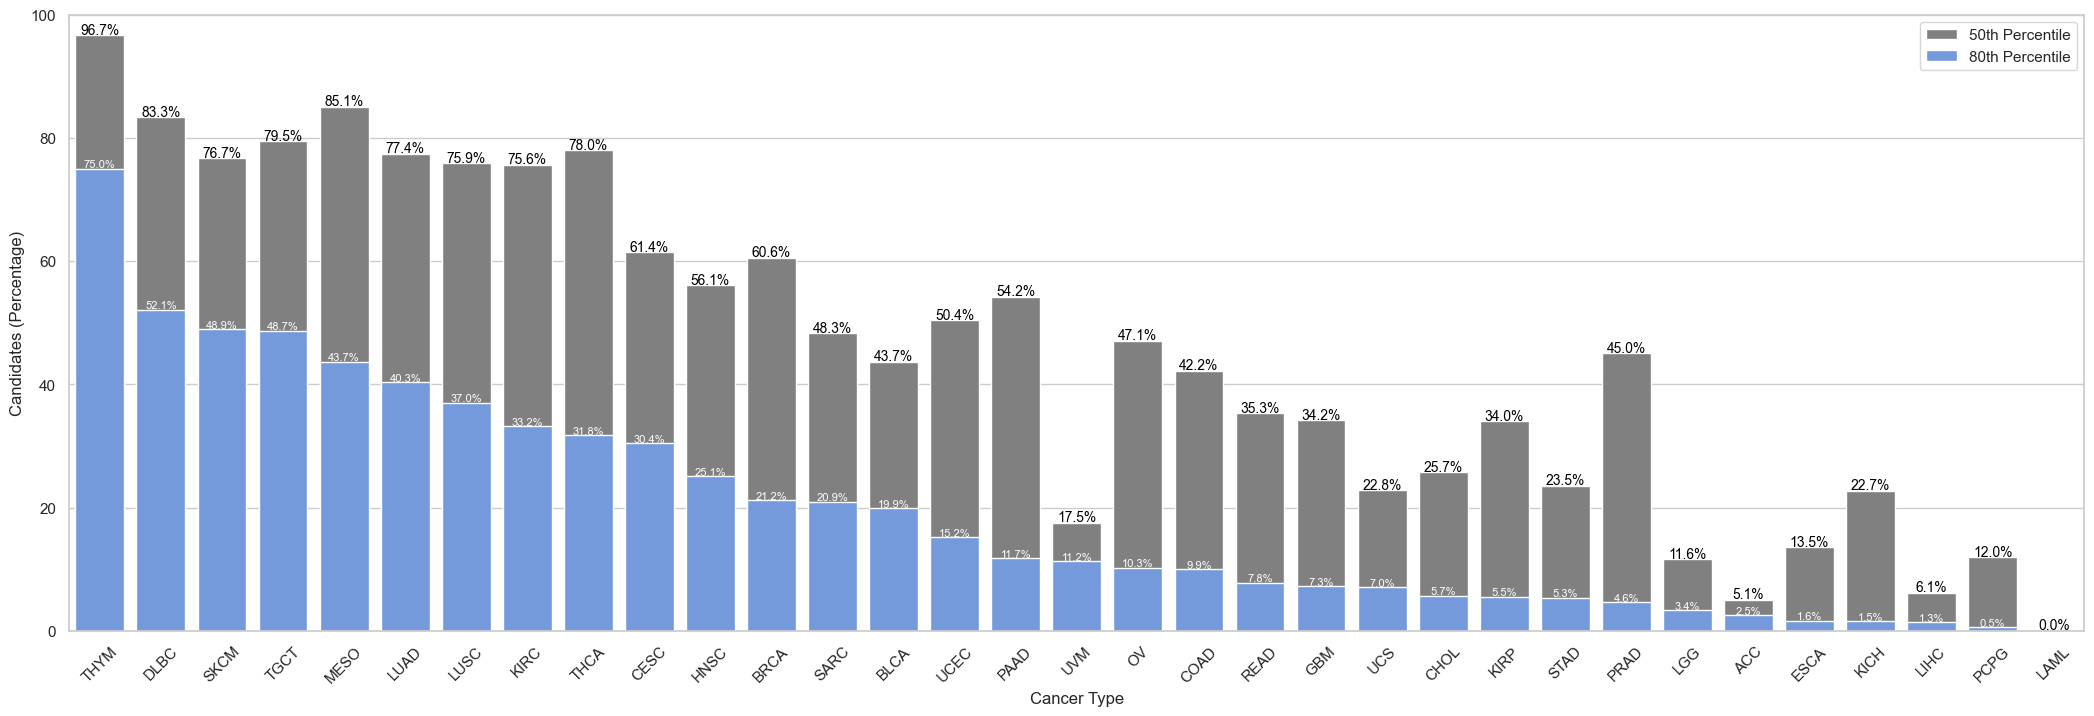

In [ ]:
# Find percentiles
total_80th = data['overall_score'].quantile(0.8)
total_50th = data['overall_score'].quantile(0.5)

# Filter data
percentile80 = data[(data['overall_score'] >= total_80th)]
percentile50 = data[(data['overall_score'] >= total_50th)]

# Count occurrences
count_80 = percentile80['project_id'].value_counts().reset_index(name='count_80')
count_50 = percentile50['project_id'].value_counts().reset_index(name='count_50')
total_counts = data['project_id'].value_counts().reset_index(name='total_count')

count_80.columns = ['project_id', 'count_80']
count_50.columns = ['project_id', 'count_50']
total_counts.columns = ['project_id', 'total_count']

# Merge counts
count_data = pd.merge(total_counts, count_50, on='project_id', how='left').fillna(0)
count_data = pd.merge(count_data, count_80, on='project_id', how='left').fillna(0)

# Calculate percentages based on total patients per cancer type
count_data['percentage_50'] = (count_data['count_50'] / count_data['total_count']) * 100
count_data['percentage_80'] = (count_data['count_80'] / count_data['total_count']) * 100

# Sort by decreasing frequency
count_data = count_data.sort_values(by='percentage_50', ascending=False).reset_index(drop=True)
count_data = count_data.sort_values(by='percentage_80', ascending=False).reset_index(drop=True)

# Set style
sns.set(style="whitegrid")
plt.figure(figsize=(26, 8))

# Bar plot
bars_50 = sns.barplot(data=count_data, x='project_id', y='percentage_50', color='grey', label='50th Percentile')
bars_80 = sns.barplot(data=count_data, x='project_id', y='percentage_80', color='cornflowerblue', label='80th Percentile')

# Add labels 
for index, row in count_data.iterrows():
        plt.text(index, row['percentage_80'] + 0.2, f"{row['percentage_80']:.1f}%", ha='center', color='white', fontdict={"size":8})
        plt.text(index, row['percentage_50'] + 0.2, f"{row['percentage_50']:.1f}%", ha='center', color='black', fontdict={"size":10})

# Labels and title
plt.xlabel("Cancer Type")
plt.ylabel("Candidates (Percentage)")
plt.xticks(rotation=45)
plt.ylim(0, 100)
plt.legend()

# Save plot
plt.savefig(fig_2_destination + fig_2_file_name)
plt.show()